In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection

import warnings

warnings.simplefilter('ignore')

In [2]:
train = pd.read_csv('./Titanic/train.csv')
test = pd.read_csv('./Titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 探索数据，数据可视化

In [7]:
sns.set_style('darkgrid')

In [8]:
def bar_plot(feature):
    fig,ax = plt.subplots(figsize=(10,6))
    df = train.groupby([feature,'Survived']).size().unstack()
    df.plot.bar(stacked = True,ax = ax)
    plt.show()

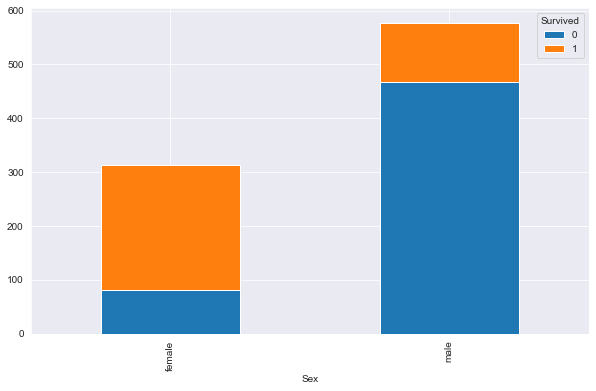

In [9]:
# 性别生存柱状堆叠图
bar_plot('Sex')

> 女性生还数量远高于男性，所以性别是一个很重要的预测特征

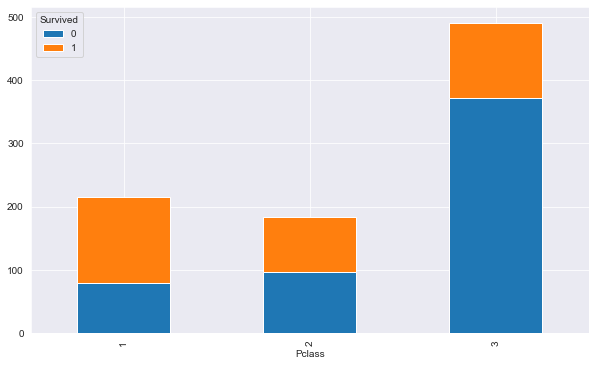

In [10]:
bar_plot('Pclass')

> 3号仓位的死亡人数远高于其他仓位，所以Pclass也是一个很重要的特征<br>
> 1号仓位的人员生还的几率最大

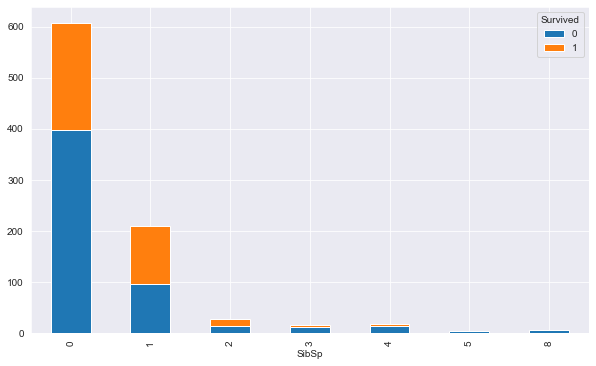

In [11]:
bar_plot('SibSp')

> 从上图可以分析出，肚子一个人乘船的死亡几率很大，当兄弟姐妹为1人或2人时生还的几率更大些

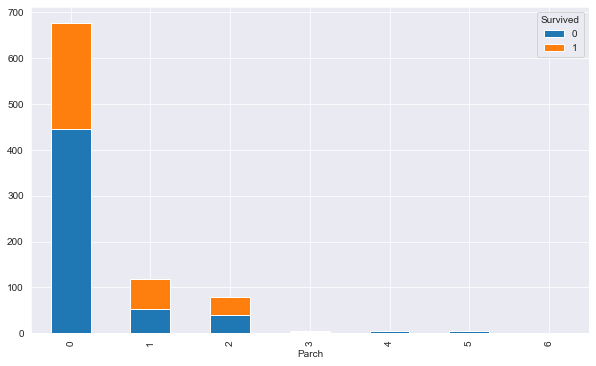

In [12]:
bar_plot('Parch')

> 父母孩子数量和上图很类似

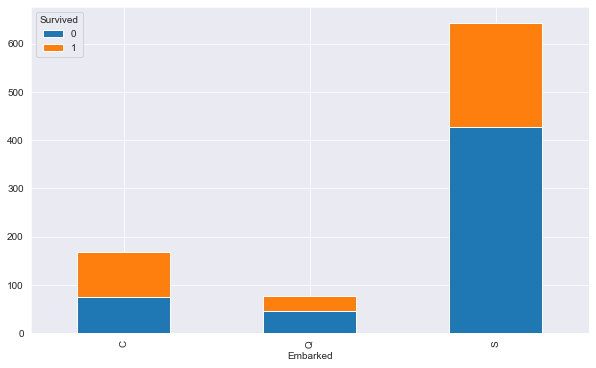

In [13]:
bar_plot('Embarked')

> 登船港口S 的死亡人数最多，登船港口C的升华几率最大

## 特征工程

+ 姓名

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.Name.str.extract(r'\s([\w]+)\.',expand=False).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Ms            1
Capt          1
Countess      1
Don           1
Lady          1
Jonkheer      1
Sir           1
Mme           1
Name: Name, dtype: int64

In [16]:
# 根据姓名中的称呼提取有用信息
for df in [train,test]:
    df['Title'] = df.Name.str.extract(r'\s([\w]+)\.',expand=False)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [18]:
# 只保留 Mr,Miss,Mrs,其他的设置为others

other_titles = train.Name.str.extract(r'\s([\w]+)\.',expand=False).value_counts()[train.Name.str.extract(r'\s([\w]+)\.',expand=False).value_counts()<100].index.to_list()
other_titles

['Master',
 'Dr',
 'Rev',
 'Major',
 'Mlle',
 'Col',
 'Ms',
 'Capt',
 'Countess',
 'Don',
 'Lady',
 'Jonkheer',
 'Sir',
 'Mme']

In [19]:
Title_map = {'Mr':0,'Miss':1,'Mrs':2}
for title in other_titles:
    Title_map[title] = 3
Title_map

{'Mr': 0,
 'Miss': 1,
 'Mrs': 2,
 'Master': 3,
 'Dr': 3,
 'Rev': 3,
 'Major': 3,
 'Mlle': 3,
 'Col': 3,
 'Ms': 3,
 'Capt': 3,
 'Countess': 3,
 'Don': 3,
 'Lady': 3,
 'Jonkheer': 3,
 'Sir': 3,
 'Mme': 3}

In [20]:
for df in [train,test]:
    df['Title'] = df.Title.map(Title_map)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


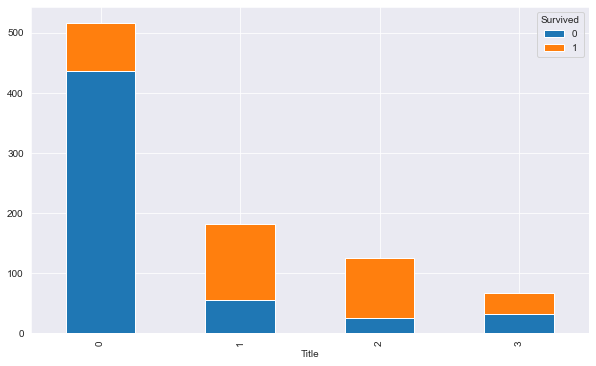

In [21]:
bar_plot('Title')

In [22]:
# 删除姓名
for df in [train,test]:
    df.drop(columns='Name',inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
# 编码性别
for df in [train,test]:
    df['Sex'] = df.Sex.map({'male':0,'female':1})
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
# 年龄，年龄有缺失值，需要处理，使用每个Title下的中位数填充

train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace = True)

In [25]:
train.Age.isnull().sum(),test.Age.isnull().sum()

(0, 0)

## Tip：transform的用法

In [26]:
df_test = pd.DataFrame({'letter':list('abcdabcd'),'value':[1,10,20,30,20,40,80,100]})
df_test

,letter,value
0,a,1
1,b,10
2,c,20
3,d,30
4,a,20
5,b,40
6,c,80
7,d,100


In [27]:
g = df_test.groupby('letter')
g.groups

{'a': [0, 4], 'b': [1, 5], 'c': [2, 6], 'd': [3, 7]}

In [28]:
g.transform('median') # 不同与聚合函数，他会返回分组前一行的行数，并且每个分组的值是原来每个分组的均值

,value
0,10.5
1,25.0
2,50.0
3,65.0
4,10.5
5,25.0
6,50.0
7,65.0


## End Tip

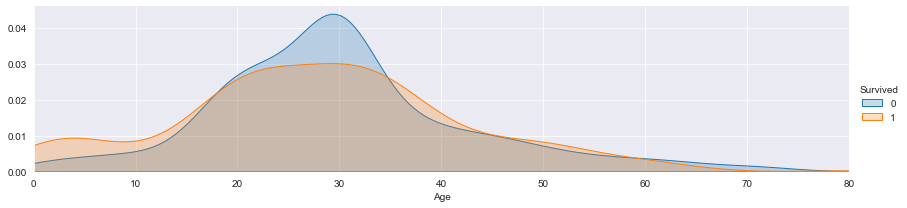

In [29]:
facet = sns.FacetGrid(train,hue = 'Survived',aspect=4) # 绘图网格
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim = (0,train.Age.max()))
facet.add_legend()

plt.show()

> 年龄分布基本符合正态分布

In [30]:
# 对年龄进行分箱,以10岁为跨度进行分箱，如果效果不好可以再分
train = train.assign(age_bin = pd.cut(train.Age,8,labels=[i for i in range(8)]))
test = test.assign(age_bin = pd.cut(test.Age,8,labels=[i for i in range(8)]))
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_bin
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,2
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2,3
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,3


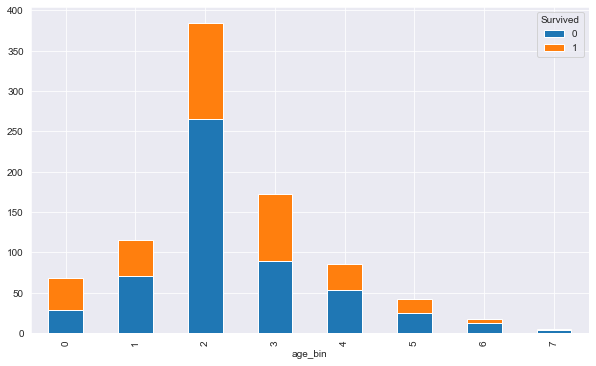

In [31]:
for df in [train,test]:
    df.drop(columns = 'Age',inplace = True)

bar_plot('age_bin')

+ Embarked

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Ticket       891 non-null    object  
 7   Fare         891 non-null    float64 
 8   Cabin        204 non-null    object  
 9   Embarked     889 non-null    object  
 10  Title        891 non-null    int64   
 11  age_bin      891 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 77.9+ KB


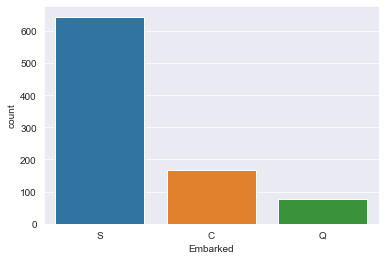

In [33]:
# Embarked 有两个缺失值

sns.countplot(x = train.Embarked)
plt.show()

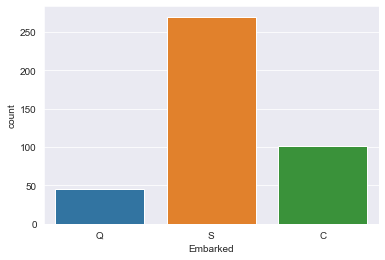

In [34]:
sns.countplot(x = test.Embarked)
plt.show()

In [35]:
test.Embarked.isnull().sum()  # 测试集没有缺失值

0

In [36]:
# S最多，缺失值较少，直接使用众数进行填充

In [37]:
train['Embarked'].fillna(train.Embarked.mode()[0],inplace=True)

In [38]:
train.Embarked.isnull().sum()

0

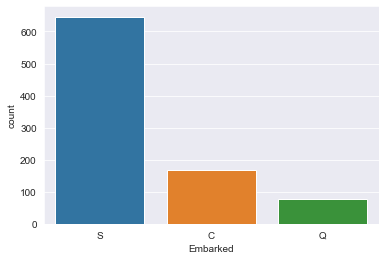

In [39]:
sns.countplot(x = train.Embarked)
plt.show()

In [40]:
# 对字符串进行编码

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_bin
0,1,0,3,0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,1,1,0,PC 17599,71.2833,C85,C,2,3
2,3,1,3,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,2
3,4,1,1,1,1,0,113803,53.1000,C123,S,2,3
4,5,0,3,0,0,0,373450,8.0500,NaN,S,0,3


In [42]:
train = pd.concat([train,pd.get_dummies(train.Embarked,drop_first=True)],axis=1)

test = pd.concat([test,pd.get_dummies(test.Embarked,drop_first=True)],axis=1)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_bin,Q,S
0,1,0,3,0,1,0,A/5 21171,7.2500,NaN,S,0,2,0,1
1,2,1,1,1,1,0,PC 17599,71.2833,C85,C,2,3,0,0
2,3,1,3,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,2,0,1
3,4,1,1,1,1,0,113803,53.1000,C123,S,2,3,0,1
4,5,0,3,0,0,0,373450,8.0500,NaN,S,0,3,0,1


In [44]:
train.shape

(891, 14)

In [45]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_bin,Q,S
0,892,3,0,0,0,330911,7.8292,NaN,Q,0.0,3,1,0
1,893,3,1,1,0,363272,7.0000,NaN,S,2.0,4,0,1
2,894,2,0,0,0,240276,9.6875,NaN,Q,0.0,6,1,0
3,895,3,0,0,0,315154,8.6625,NaN,S,0.0,2,0,1
4,896,3,1,1,1,3101298,12.2875,NaN,S,2.0,2,0,1


+ Fare

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Ticket       891 non-null    object  
 7   Fare         891 non-null    float64 
 8   Cabin        204 non-null    object  
 9   Embarked     891 non-null    object  
 10  Title        891 non-null    int64   
 11  age_bin      891 non-null    category
 12  Q            891 non-null    uint8   
 13  S            891 non-null    uint8   
dtypes: category(1), float64(1), int64(7), object(3), uint8(2)
memory usage: 79.7+ KB


In [47]:
test.info()  # test 数据集中Fare 和Title 各少一个

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   SibSp        418 non-null    int64   
 4   Parch        418 non-null    int64   
 5   Ticket       418 non-null    object  
 6   Fare         417 non-null    float64 
 7   Cabin        91 non-null     object  
 8   Embarked     418 non-null    object  
 9   Title        417 non-null    float64 
 10  age_bin      418 non-null    category
 11  Q            418 non-null    uint8   
 12  S            418 non-null    uint8   
dtypes: category(1), float64(2), int64(5), object(3), uint8(2)
memory usage: 34.4+ KB


In [48]:
# Fare 和Pclass 相关，使用Pclass 分组中位数填充

test.Title.fillna(test.Title.mode()[0],inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   SibSp        418 non-null    int64   
 4   Parch        418 non-null    int64   
 5   Ticket       418 non-null    object  
 6   Fare         418 non-null    float64 
 7   Cabin        91 non-null     object  
 8   Embarked     418 non-null    object  
 9   Title        418 non-null    float64 
 10  age_bin      418 non-null    category
 11  Q            418 non-null    uint8   
 12  S            418 non-null    uint8   
dtypes: category(1), float64(2), int64(5), object(3), uint8(2)
memory usage: 34.4+ KB


In [49]:
# 删除掉Embarked列

for df in [train,test]:
    df.drop(columns = 'Embarked',inplace = True)


In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Title,age_bin,Q,S
0,1,0,3,0,1,0,A/5 21171,7.2500,NaN,0,2,0,1
1,2,1,1,1,1,0,PC 17599,71.2833,C85,2,3,0,0
2,3,1,3,1,0,0,STON/O2. 3101282,7.9250,NaN,1,2,0,1
3,4,1,1,1,1,0,113803,53.1000,C123,2,3,0,1
4,5,0,3,0,0,0,373450,8.0500,NaN,0,3,0,1


In [54]:
# 对Fare 进行标准化

train['Fare'] = (train.Fare - train.Fare.mean())/train.Fare.std()
test['Fare'] = (test.Fare - test.Fare.mean())/test.Fare.std()

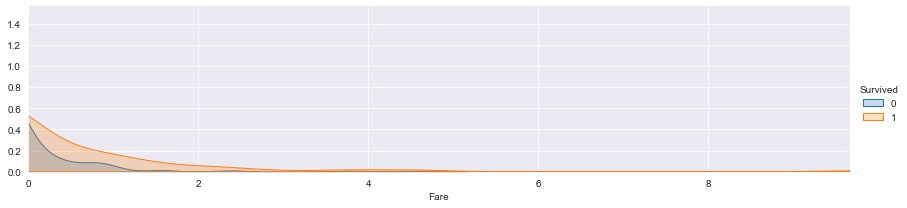

In [55]:
facet = sns.FacetGrid(train,hue = 'Survived',aspect=4) # 绘图网格
facet.map(sns.kdeplot,'Fare',shade = True)
facet.set(xlim = (0,train.Fare.max()))
facet.add_legend()

plt.show()

In [ ]:
# 可以考虑对数据进行分箱

In [56]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Title,age_bin,Q,S
0,1,0,3,0,1,0,A/5 21171,-0.502163,NaN,0,2,0,1
1,2,1,1,1,1,0,PC 17599,0.786404,C85,2,3,0,0
2,3,1,3,1,0,0,STON/O2. 3101282,-0.488580,NaN,1,2,0,1
3,4,1,1,1,1,0,113803,0.420494,C123,2,3,0,1
4,5,0,3,0,0,0,373450,-0.486064,NaN,0,3,0,1


In [57]:
train.Cabin.isnull().mean()

0.7710437710437711

# Ticket 与 Cabin 

In [58]:
# Ticket 对数据没有影响，Cabin缺失严重，直接删除

for df in [train,test]:
    df.drop(columns = ['Ticket','Cabin'],inplace = True)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Title,age_bin,Q,S
0,1,0,3,0,1,0,-0.502163,0,2,0,1
1,2,1,1,1,1,0,0.786404,2,3,0,0
2,3,1,3,1,0,0,-0.488580,1,2,0,1
3,4,1,1,1,1,0,0.420494,2,3,0,1
4,5,0,3,0,0,0,-0.486064,0,3,0,1


# 家庭人员数量

In [61]:
# 合并 SibSp	Parch 这两列数据到新的列

In [62]:
train['FamilySize'] = train.SibSp + train.Parch + 1
test['FamilySize'] = test.SibSp + test.Parch + 1

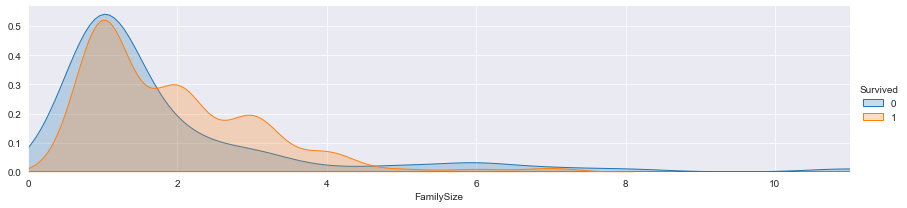

In [63]:
facet = sns.FacetGrid(train,hue = 'Survived',aspect=4) # 绘图网格
facet.map(sns.kdeplot,'FamilySize',shade = True)
facet.set(xlim = (0,train.FamilySize.max()))
facet.add_legend()

plt.show()

In [64]:
# 数据偏态，可以进行尝试分箱并设置权重

In [65]:
# 删除 SibSp 与 Parch列
for df in [train,test]:
    df.drop(columns = ['SibSp','Parch'],inplace = True)

In [66]:
train.head()

,PassengerId,Survived,Pclass,Sex,Fare,Title,age_bin,Q,S,FamilySize
0,1,0,3,0,-0.502163,0,2,0,1,2
1,2,1,1,1,0.786404,2,3,0,0,2
2,3,1,3,1,-0.488580,1,2,0,1,1
3,4,1,1,1,0.420494,2,3,0,1,2
4,5,0,3,0,-0.486064,0,3,0,1,1


In [67]:
# 删除 PassengerId列
for df in [train,test]:
    df.drop(columns = ['PassengerId'],inplace = True)

In [68]:
train.head()

,Survived,Pclass,Sex,Fare,Title,age_bin,Q,S,FamilySize
0,0,3,0,-0.502163,0,2,0,1,2
1,1,1,1,0.786404,2,3,0,0,2
2,1,3,1,-0.488580,1,2,0,1,1
3,1,1,1,0.420494,2,3,0,1,2
4,0,3,0,-0.486064,0,3,0,1,1


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    int64   
 3   Fare        891 non-null    float64 
 4   Title       891 non-null    int64   
 5   age_bin     891 non-null    category
 6   Q           891 non-null    uint8   
 7   S           891 non-null    uint8   
 8   FamilySize  891 non-null    int64   
dtypes: category(1), float64(1), int64(5), uint8(2)
memory usage: 44.9 KB


In [70]:
test.head()

,Pclass,Sex,Fare,Title,age_bin,Q,S,FamilySize
0,3,0,-0.496476,0.0,3,1,0,1
1,3,1,-0.511321,2.0,4,0,1,2
2,2,0,-0.463207,0.0,6,1,0,1
3,3,0,-0.481558,0.0,2,0,1,1
4,3,1,-0.416660,2.0,2,0,1,3


In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    int64   
 1   Sex         418 non-null    int64   
 2   Fare        418 non-null    float64 
 3   Title       418 non-null    float64 
 4   age_bin     418 non-null    category
 5   Q           418 non-null    uint8   
 6   S           418 non-null    uint8   
 7   FamilySize  418 non-null    int64   
dtypes: category(1), float64(2), int64(3), uint8(2)
memory usage: 18.1 KB


## 开始建模

In [81]:
import xgboost

In [93]:
# 准备数据
X = train.drop(columns='Survived').to_numpy()
y = train['Survived'].to_numpy()

In [96]:
X[:2]

array([[ 3.        ,  0.        , -0.50216314,  0.        ,  2.        ,
         0.        ,  1.        ,  2.        ],
       [ 1.        ,  1.        ,  0.78640362,  2.        ,  3.        ,
         0.        ,  0.        ,  2.        ]])

In [97]:
y[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [98]:
# 分割数据集
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.2,stratify=y,random_state = 42)

In [110]:
cv = model_selection.StratifiedKFold(n_splits=8,shuffle=True)

model = xgboost.XGBClassifier(booster = 'gbtree',max_depth = 2,learning_rate = 0.01,n_estimators = 15000,random_state = 42,n_jobs = -1,use_label_encoder=False)
model_selection.cross_val_score(model,X,y,cv = cv).mean()

[12:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.8326998873873874

In [114]:
model.fit(X,y)

[12:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=15000, n_jobs=-1, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [116]:
test.head()

,Pclass,Sex,Fare,Title,age_bin,Q,S,FamilySize
0,3,0,-0.496476,0.0,3,1,0,1
1,3,1,-0.511321,2.0,4,0,1,2
2,2,0,-0.463207,0.0,6,1,0,1
3,3,0,-0.481558,0.0,2,0,1,1
4,3,1,-0.416660,2.0,2,0,1,3


In [112]:
sub = pd.read_csv('./Titanic/gender_submission.csv')
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [118]:
sub['Survived'] = model.predict(test.to_numpy())

In [119]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [121]:
sub.to_csv('./Titanic/gender_submission.csv',index=False)

## 选择其他模型训练
+ XGboost -- 0.8326

In [123]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [131]:
cv = model_selection.StratifiedKFold(n_splits=8,shuffle=True)

model = HistGradientBoostingClassifier(learning_rate=0.1,max_iter= 100,random_state=42)
model_selection.cross_val_score(model,X,y,cv = cv).mean()

0.8327401061776062

In [133]:
from sklearn.ensemble import ExtraTreesClassifier

cv = model_selection.StratifiedKFold(n_splits=8,shuffle=True)

model = ExtraTreesClassifier(n_estimators=500)
model_selection.cross_val_score(model,X,y,cv = cv).mean()

0.8136965090090089

In [135]:
from sklearn.svm import SVC

cv = model_selection.StratifiedKFold(n_splits=8,shuffle=True)

model = SVC()
model_selection.cross_val_score(model,X,y,cv = cv).mean()

0.8271396396396397

In [137]:
from sklearn.ensemble import RandomForestClassifier

cv = model_selection.StratifiedKFold(n_splits=8,shuffle=True)

model = RandomForestClassifier(n_estimators=500)
model_selection.cross_val_score(model,X,y,cv = cv).mean()

0.8024050836550837

In [ ]:
cv = model_selection.StratifiedKFold(n_splits=8,shuffle=True)

model = xgboost.XGBClassifier(booster = 'gbtree',max_depth = 2,learning_rate = 0.01,n_estimators = 15000,random_state = 42,n_jobs = -1,use_label_encoder=False)
model_selection.cross_val_score(model,X,y,cv = cv).mean()

In [142]:
# 算法堆叠

from sklearn.linear_model import LogisticRegression

models = [xgboost.XGBClassifier(booster = 'gbtree',max_depth = 2,learning_rate = 0.1,n_estimators = 100,random_state = 42,n_jobs = -1,use_label_encoder=False)
         ,HistGradientBoostingClassifier(learning_rate=0.1,max_iter= 100,random_state=42)
          ,ExtraTreesClassifier(n_estimators=500)
          ,SVC()
          ,RandomForestClassifier(n_estimators=500)
         ]

lr = LogisticRegression()

from mlxtend.classifier import StackingClassifier

clfs = models
stack = StackingClassifier(classifiers=clfs,meta_classifier = lr)
kfold = model_selection.KFold(n_splits=10,random_state=42,shuffle=True) # 交叉验证模式
s = model_selection.cross_val_score(stack,X,y,cv = kfold)
s.mean(),s.std()

[13:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:47:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(0.8159051186017479, 0.025416228162611843)